In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\Aniket\Desktop\INTENTION")
x_train=np.load('X_train_ML.npy')
y_train=np.load('Y_train_ML.npy')
x_vel=np.load("X_vel_ML.npy")
y_vel=np.load("Y_vel_ML.npy")
min_m=np.load("min_m_ML.npy")
max_m=np.load("max_m_ML.npy")

In [2]:
shape=x_train.shape
print("input shape:",shape)
Shapey=y_train.shape
print("output shape:",y_train.shape)
print("x_vel.shape",x_vel.shape)
print("y_vel.shape",y_vel.shape)
print("min_m.shape",min_m.shape)
print("max_m.shape",max_m.shape)

input shape: (129040, 500)
output shape: (129040, 75)
x_vel.shape (32261, 100, 5)
y_vel.shape (32261, 15, 5)
min_m.shape (1, 1, 5)
max_m.shape (1, 1, 5)


In [4]:
print("x_vel.shape",x_vel.shape)
x_val_reshaped = x_vel.reshape(-1, 500)
print("x_val_reshaped.shspe:",x_val_reshaped.shape)
y_val_reshaped=y_vel.reshape(-1,75)
print("y_val_reshaped.shspe:",y_val_reshaped.shape)

x_vel.shape (32261, 100, 5)
x_val_reshaped.shspe: (32261, 500)
y_val_reshaped.shspe: (32261, 75)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.regularizers import l1, l2
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(500, 1), kernel_regularizer=l1(1e-16), recurrent_regularizer=l1(1e-16), bias_regularizer=l1(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.compile(optimizer='adam', loss='mean_squared_error')

history=model.fit(x_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
4033/4033 [==============================] - 114s 28ms/step - loss: 2.5275
Epoch 2/10
4033/4033 [==============================] - 113s 28ms/step - loss: 2.2518
Epoch 3/10
4033/4033 [==============================] - 113s 28ms/step - loss: 2.1930
Epoch 4/10
4033/4033 [==============================] - 112s 28ms/step - loss: 2.1365
Epoch 5/10
4033/4033 [==============================] - 112s 28ms/step - loss: 2.0880
Epoch 6/10
4033/4033 [==============================] - 112s 28ms/step - loss: 2.0537
Epoch 7/10
4033/4033 [==============================] - 113s 28ms/step - loss: 2.0285
Epoch 8/10
4033/4033 [==============================] - 113s 28ms/step - loss: 2.0164
Epoch 9/10
4033/4033 [==============================] - 113s 28ms/step - loss: 1.9999
Epoch 10/10
4033/4033 [==============================] - 113s 28ms/step - loss: 3.0097


In [7]:

x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
y_train_reshaped = y_train.reshape((y_train.shape[0], y_train.shape[1]))
y_pred = model.predict(x_train_reshaped)
SS_res = np.sum(np.square(y_train_reshaped - y_pred))
SS_tot = np.sum(np.square(y_train_reshaped - np.mean(y_train_reshaped)))
r2 = 1 - (SS_res / SS_tot)
print("R-squared (R2):", r2)
mse = np.mean(np.square(y_train_reshaped - y_pred))
print("Mean Squared Error (MSE):", mse)
print(mae)




4033/4033 [==============================] - 43s 11ms/step
R-squared (R2): 0.5700445301857933
Mean Squared Error (MSE): 2.553910207223861


In [8]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
x_test_reshaped = x_val_reshaped.reshape((x_val_reshaped.shape[0], x_val_reshaped.shape[1], 1))


y_pred = model.predict(x_test_reshaped)


mse = mean_squared_error(y_val_reshaped, y_pred)


mae = mean_absolute_error(y_val_reshaped, y_pred)


sd = np.std(y_val_reshaped - y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Standard Deviation (SD):", sd)


1009/1009 [==============================] - 11s 11ms/step
Mean Squared Error (MSE): 2.5665119696433836
Mean Absolute Error (MAE): 0.9404492174936121
Standard Deviation (SD): 1.601964972295331


In [17]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val_reshaped, y_val_reshaped))



training_loss = history.history['loss']
validation_loss = history.history['val_loss']  

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
4032/4033 [============================>.] - ETA: 0s - loss: 2.2057

ValueError: in user code:

    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aniket\Videos\New folder\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 500, 1), found shape=(None, 100, 5)


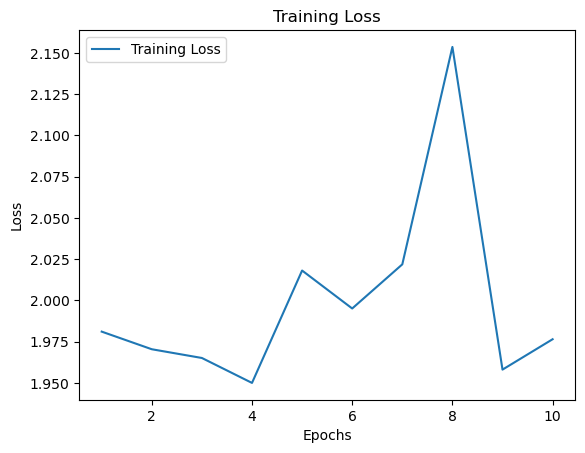

In [6]:
training_loss = history.history['loss']

# Creating a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plotting the training loss curve
plt.plot(epochs, training_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
import time

In [18]:
# Start timing
start_time = time.time()

# Train the model
history = model.fit(x_train_reshaped, y_train_reshaped, epochs=10, batch_size=32)

# End timing
end_time = time.time()

# Calculate the time taken for training
time_taken = end_time - start_time

print("Time taken for training:", time_taken, "seconds")

Epoch 1/10
4033/4033 [==============================] - 236s 59ms/step - loss: 2.2427
Epoch 2/10
1451/4033 [=========>....................] - ETA: 2:31 - loss: 3.2623

KeyboardInterrupt: 

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.regularizers import l1, l2
import time
import psutil

# Assuming you have loaded or generated your training data x_train and y_train

# Function to get memory usage in MB
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)

# Create the model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(500, 1), kernel_regularizer=l1(1e-16), recurrent_regularizer=l1(1e-16), bias_regularizer=l1(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.add(Dense(units=75, kernel_regularizer=l2(1e-16)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape training data as required
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
y_train_reshaped = y_train.reshape((y_train.shape[0], y_train.shape[1]))

# Get memory usage before training
memory_before_training = get_memory_usage()

# Start timing
start_time = time.time()

# Train the model
history = model.fit(x_train_reshaped, y_train_reshaped, epochs=10, batch_size=32)

# End timing
end_time = time.time()

# Calculate the time taken for training
time_taken = end_time - start_time

# Get memory usage after training
memory_after_training = get_memory_usage()

# Calculate memory used during training
memory_used = memory_after_training - memory_before_training

print("Time taken for training:", time_taken, "seconds")
print("Memory used during training:", memory_used, "MB")


Epoch 1/10
4033/4033 [==============================] - 220s 54ms/step - loss: 2.5427
Epoch 2/10
4033/4033 [==============================] - 204s 51ms/step - loss: 2.2722
Epoch 3/10
4033/4033 [==============================] - 189s 47ms/step - loss: 2.2029
Epoch 4/10
4033/4033 [==============================] - 149s 37ms/step - loss: 2.1609
Epoch 5/10
4033/4033 [==============================] - 123s 31ms/step - loss: 2.1268
Epoch 6/10
4033/4033 [==============================] - 122s 30ms/step - loss: 2.0863
Epoch 7/10
4033/4033 [==============================] - 124s 31ms/step - loss: 2.0678
Epoch 8/10
4033/4033 [==============================] - 126s 31ms/step - loss: 2.0358
Epoch 9/10
4033/4033 [==============================] - 125s 31ms/step - loss: 2.0176
Epoch 10/10
4033/4033 [==============================] - 125s 31ms/step - loss: 2.0010
Time taken for training: 1507.5062835216522 seconds
Memory used during training: 245.48828125 MB


In [20]:
import psutil

def get_memory_used():
    process = psutil.Process()
    memory_info = process.memory_info()
    memory_used = memory_info.rss  
    return memory_used

if __name__ == "__main__":
    memory_used = get_memory_used()
    print(f"Memory Used: {memory_used} bytes")

Memory Used: 1500270592 bytes


In [21]:
print("shape of min_m:",min_m.shape)
min_m_reshape=min_m.reshape(-1,5)
print("min_m_reshape=",min_m_reshape.shape)
max_m_reshape=max_m.reshape(-1,5)
print("max_m_reshape=",max_m_reshape.shape)

shape of min_m: (1, 1, 5)
min_m_reshape= (1, 5)
max_m_reshape= (1, 5)


In [22]:
x_test12=np.load('x_in12.npy')
y_test12=np.load('y_op12.npy')
print("x_test12.shape:",x_test12.shape)
print("y_test12.shape:",y_test12.shape)

x_test12.shape: (16046, 100, 5)
y_test12.shape: (16046, 15, 5)


In [23]:
x_norm=(x_test12-min_m_reshape)/(max_m_reshape-min_m_reshape)
print(x_norm)

[[[0.3827419  0.51593461 0.4018613  0.45883533 0.50436771]
  [0.38202139 0.51656545 0.40224799 0.45907565 0.50400144]
  [0.38245823 0.51746373 0.40222012 0.45895361 0.50456772]
  ...
  [0.39219826 0.51257151 0.40065783 0.45382585 0.49483494]
  [0.39106777 0.50947188 0.40130774 0.45306802 0.49664447]
  [0.38750032 0.50947963 0.40153741 0.45196297 0.4995851 ]]

 [[0.38202139 0.51656545 0.40224799 0.45907565 0.50400144]
  [0.38245823 0.51746373 0.40222012 0.45895361 0.50456772]
  [0.38202444 0.51787686 0.40220234 0.45883839 0.50465072]
  ...
  [0.39106777 0.50947188 0.40130774 0.45306802 0.49664447]
  [0.38750032 0.50947963 0.40153741 0.45196297 0.4995851 ]
  [0.38472053 0.51065097 0.40160003 0.45089831 0.5050765 ]]

 [[0.38245823 0.51746373 0.40222012 0.45895361 0.50456772]
  [0.38202444 0.51787686 0.40220234 0.45883839 0.50465072]
  [0.38244254 0.51851574 0.40217068 0.45895275 0.50404554]
  ...
  [0.38750032 0.50947963 0.40153741 0.45196297 0.4995851 ]
  [0.38472053 0.51065097 0.4016000

In [24]:
x_test12_reshape= x_test12.reshape(-1, 500)
print("x_test12_reshape shape:",x_test12_reshape.shape)
y_test12_reshape= y_test12.reshape(-1, 75)
print("y_test12_reshape shape:",y_test12_reshape.shape)

x_test12_reshape shape: (16046, 500)
y_test12_reshape shape: (16046, 75)


In [25]:
y_pred_test = model.predict(x_test12_reshape)

502/502 [==============================] - 7s 14ms/step


In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test12_reshape,y_pred_test))
print(r2_score(y_test12_reshape,y_pred_test))
print(mean_absolute_error(y_test12_reshape,y_pred_test))

920.246507660033
-163.36288268018052
15.442814501767328


In [27]:
import numpy as np

# Assuming you have already trained the model and made predictions on x_test_split
y_pred = model.predict(x_test12_reshape)

# Calculate the standard deviation of the predictions
std_deviation = np.std(y_pred_test)

print("Standard Deviation of Predictions:", std_deviation)

502/502 [==============================] - 8s 16ms/step
Standard Deviation of Predictions: 29.551653


In [28]:
import psutil

def get_memory_used():
    process = psutil.Process()
    memory_info = process.memory_info()
    memory_used = memory_info.rss  
    return memory_used

if __name__ == "__main__":
    memory_used = get_memory_used()
    print(f"Memory Used: {memory_used} bytes")

Memory Used: 1741357056 bytes
